In [6]:
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import warnings


**DataClustering with K-mean**
we used K-mean clustering to clustering the listings based on their description(provided by the owner)

In [7]:
warnings.filterwarnings("ignore")

#read csv 
df_listings = pd.read_csv('Data//listings.csv')

#Filter rows with no description
df_listings = df_listings[df_listings['description'].notnull()]

#code reference : Stack Overflow : How to use scikit learn for text clustering 


#Add Chicago to the list to stop words since presence of the words 
#would add no meaning to any cluster 

lst = stopwords.words('english')
lst.append('chicago')


vectorizer = TfidfVectorizer(stop_words= lst ,min_df = 0.2)

#Fit to data, then transform it.
#Turning  words in the the description into numerical feaure vectors
X = vectorizer.fit_transform(df_listings['description'])

#select number of clusters to formed as 3 
#(we selected the number by analysing the description for a few clusters)
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
#Predict the cluster group for all the descriptions
Y = vectorizer.transform(df_listings['description'])
prediction = model.predict(Y)



**Word Cloud for Clusters**

We created word cloud for the clusters formed using K-mean clustering.
The 3 cluster with repect to the words used could be categorised as in no paticular order 

1.Basic Place : this cluster group shows word like Room,Bedroom,Living room that referes to basic necessities or a place having all basic,where you could crash for a night!!

2.City Centred Places : This cluster group shows word like restaurants,downtown,park which related to places that are centre of everything !!

3.PlaceImportance : This group has words like plac,location,space which stresses more on the neighbourhood or feel of the place probably related to more relaxing places 

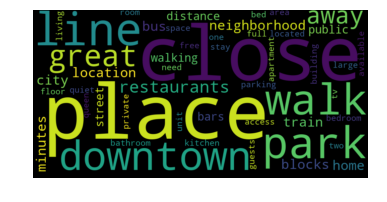

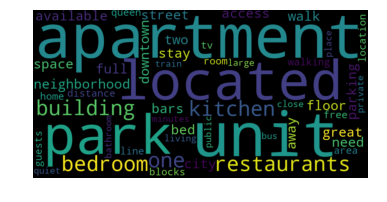

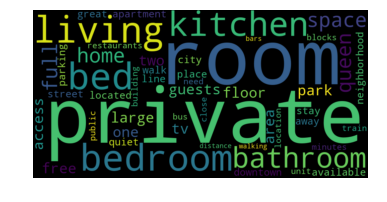

In [9]:
# Create a word cloud for the clusters generated !

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

# get term names from the numbers 
terms = vectorizer.get_feature_names()


cluster1 = []
for ind in order_centroids[0, :]:
    cluster1.append(terms[ind])
      
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(cluster1))
plt.figure()
# plot words
plt.imshow(wordcloud, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()


cluster2 = []
for ind in order_centroids[1, :]:
    cluster2.append(terms[ind])
    
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(cluster2))
plt.figure()
# plot words
plt.imshow(wordcloud, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()


cluster3 = []
for ind in order_centroids[2, :]:
    cluster3.append(terms[ind])
    
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(cluster3))
plt.figure()
# plot words
plt.imshow(wordcloud, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()


In [10]:
#Add new column to the dataframe with the cluster group of that listing 

df_listings['Description_ClusterGroup'] = prediction    

**Data Cleaning**

In [11]:
df_listings.isnull().values.any()
df_listings.isnull().sum()/len(df_listings)*100


id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.019209
summary                               1.555897
space                                24.145217
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                31.079524
notes                                50.461007
transit                              27.852478
access                               31.598156
interaction                          31.905494
house_rules                          25.124856
thumbnail_url                        14.771418
medium_url                           14.771418
picture_url                           0.000000
xl_picture_url                       14.771418
host_id                               0.000000
host_url                              0.000000
host_name    

In [12]:
#filter out columns ending with url 
df_listings = df_listings.filter(regex=r'^((?!_url).)*$')


#Drop all the columns we are sure we would not use 
df_listings = df_listings.drop(['scrape_id','review_scores_accuracy',
                                'review_scores_value','review_scores_communication','review_scores_checkin',
                                'review_scores_cleanliness','calendar_updated','require_guest_phone_verification',
                                'neighbourhood_group_cleansed',
                                'calendar_last_scraped','host_has_profile_pic','requires_license','host_about',
                                'neighbourhood','host_acceptance_rate','last_scraped','experiences_offered',
                                'space','summary','neighborhood_overview','notes','require_guest_profile_picture',
                                'host_neighbourhood','host_location','country_code','square_feet',
                                'review_scores_location',
                                'neighbourhood','jurisdiction_names','license','has_availability',
                                   'description','transit','access','house_rules','interaction'], axis=1)

df_listings.info()                

   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206 entries, 0 to 5206
Data columns (total 53 columns):
id                                5206 non-null int64
name                              5205 non-null object
host_id                           5206 non-null int64
host_name                         5206 non-null object
host_since                        5206 non-null object
host_response_time                4950 non-null object
host_response_rate                4950 non-null object
host_is_superhost                 5206 non-null object
host_listings_count               5206 non-null int64
host_total_listings_count         5206 non-null int64
host_verifications                5206 non-null object
host_identity_verified            5206 non-null object
street                            5206 non-null object
neighbourhood_cleansed            5206 non-null object
city                              5206 non-null object
state                             5206 non-null object
zipcode          

In [13]:
#Cleaned the money fields with chartacter like $
df_listings['price'] = df_listings['price'] = df_listings['price'].replace('[\$,)]','',regex=True).astype(float)
df_listings['weekly_price'] = df_listings['weekly_price'] = df_listings['price'].replace('[\$,)]','',regex=True).astype(float)
df_listings['security_deposit'] = df_listings['security_deposit'].replace('[\$,)]','',regex=True).astype(float)
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].replace('[\$,)]','',regex=True).astype(float)
df_listings['extra_people'] = df_listings['extra_people'].replace('[\$,)]','',regex=True).astype(float)
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('[\%,)]','',regex=True).astype(float)


# Fill NAs with the mean for some column 
#df_listings['price'].fillna((df_listings['price'].mean()), inplace=True)
df_listings['weekly_price'].fillna((df_listings['weekly_price'].mean()), inplace=True)
df_listings['monthly_price'].fillna((df_listings['weekly_price'].mean()), inplace=True)
df_listings['review_scores_rating'].fillna((df_listings['review_scores_rating'].mean()), inplace=True)
df_listings['host_response_rate'].fillna((df_listings['host_response_rate'].mean()), inplace=True)


#Fill NAs with 0 for some columns 
df_listings['reviews_per_month'].fillna(0, inplace=True)
df_listings['bathrooms'].fillna(0, inplace=True)
df_listings['bedrooms'].fillna(0, inplace=True)
df_listings['beds'].fillna(0, inplace=True)
df_listings['cleaning_fee'].fillna(0, inplace=True)
df_listings['extra_people'].fillna(0, inplace=True)
df_listings['security_deposit'].fillna(0, inplace=True)

#Fill blanks for some columns 
df_listings['host_response_time'].fillna("", inplace=True)
df_listings['name'].fillna("", inplace=True)



# converting date fields from string to datetime 
df_listings['first_review'] = pd.to_datetime(df_listings['first_review'])
df_listings['last_review'] = pd.to_datetime(df_listings['last_review'])
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'])

# Converting True and false to binary 0 - 1 
df_listings['instant_bookable'] = df_listings['instant_bookable'].map({'t': 1, 'f': 0})
df_listings['is_location_exact'] = df_listings['is_location_exact'].map({'t': 1, 'f': 0})
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].map({'t': 1, 'f': 0})
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})

df_listings.isnull().sum()




id                                  0
name                                0
host_id                             0
host_name                           0
host_since                          0
host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_identity_verified              0
street                              0
neighbourhood_cleansed              0
city                                0
state                               0
zipcode                            61
market                             28
smart_location                      0
country                             0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms   

In [14]:
#cleaned the column Amenities and create individual columns for every amenity 
df_listings['amenities'] = df_listings['amenities'].replace('[\{}"]','',regex=True)
amenity_ohe = df_listings['amenities'].str.get_dummies(sep = ",")
df_listings = pd.concat([df_listings, amenity_ohe], axis=1)

#Drop the original column 
df_listings=df_listings.drop(['amenities'],axis = 1)


In [15]:
#write the cleaned file to csv
df_listings.to_csv("Data//CleanedListings.csv")
